
# Predicting Heart Disease using Machine Learning 🫀🤖


## Problem Definition:
In this project, we will focus on a **binary classification** task. Our objective is to utilize a diverse set of features, representing various pieces of information about individuals, to accurately predict whether they have heart disease or not.

<img src="https://cdn.pixabay.com/photo/2015/11/12/13/08/heart-care-1040229_1280.png" alt="Heart Disease"   width="500">

## Data📊
The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

There is also a version of it available on [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

#### **Data Dictionary-**

1. `age` Displays the age of the individual.
2. `sex` (Male/Female) : 1 = male 0 = female
3. `cp` Chest pain type [0 =typical angina, 1 = atypical angina, 2 =non-anginal, 3 = asymptomatic]
4. `trestbps` Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is typically cause for concern.
5. `chol` (Serum Cholesterol in mg/dl)
6. `fbs` Fasting Blood Sugar (if fasting blood sugar > 120 mg/dl then: 1 = true, 0 = false, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes)
7. `restecg` (Resting Electrocardiographic Results)- Values: [0 = normal, 1 = having ST-T wave abnormality, 2 = Left Ventricle Hypertrophy]
8. `thalach`: Maximum heart rate achieved
9. `exang`: Exercise-induced angina (1 = True, 0 = False)
10. `oldpeak`: ST depression induced by exercise relative to rest
11. `slope`: The slope of the peak exercise ST segment: [0 = upsloping: better heart rate with excercise (uncommon), 1 = flat: minimal change (typical healthy heart), 2 = downsloping: signs of unhealthy heart]
12. `ca`: Number of major vessels (0-3) colored by fluoroscopy
13. `thal`: Displays the Thalassemia: [1,3 = normal, 6 = fixed defect, 7 = reversible defect: no proper blood movement when excercising]
14. `Target`: Displays whether the individual is suffering from heart disease or not : [1 = yes, 0 = no]

## Preparing the tools🔧


In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## Loading the data📂

In [2]:
# (rows, columns)
df = pd.read_csv("heart-disease.csv")
df.shape  
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Checking how many people have heart diseases[1=yes, 0=no]
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

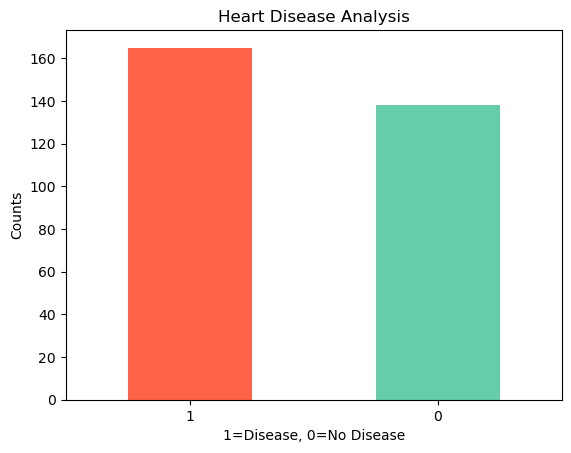

In [4]:
df["target"].value_counts().plot(kind='bar',title='Heart Disease Analysis', xlabel='1=Disease, 0=No Disease', ylabel='Counts',color=["tomato", "mediumaquamarine"]);
plt.xticks(rotation=0);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex 👨👩

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


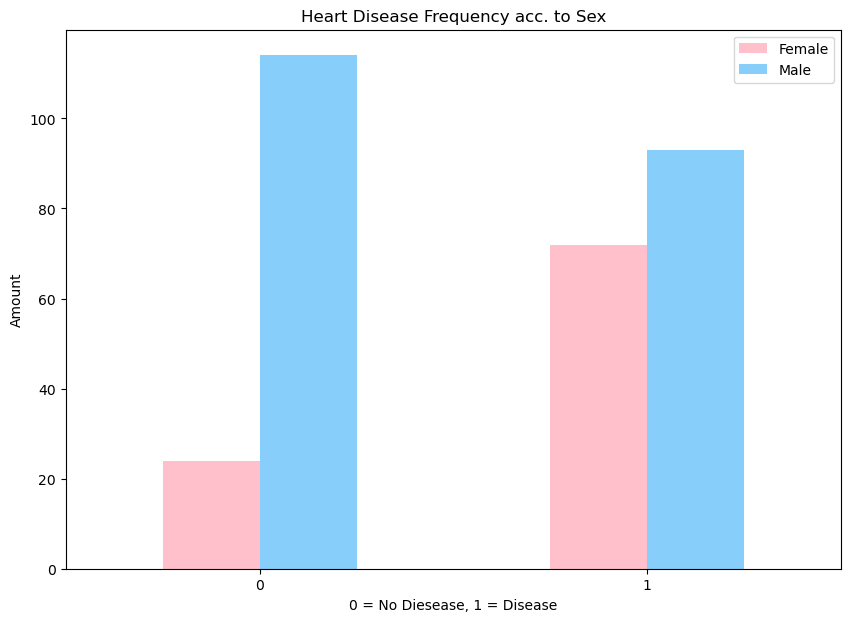

In [9]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,7),
                                    color=["pink", "lightskyblue"])

plt.title("Heart Disease Frequency acc. to Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### 📊 Age vs. Max Heart Rate for Heart Disease 

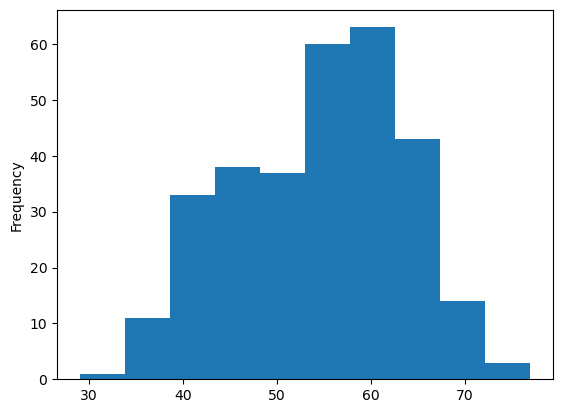

In [10]:
# Age Distribution with histogram
df.age.plot.hist();

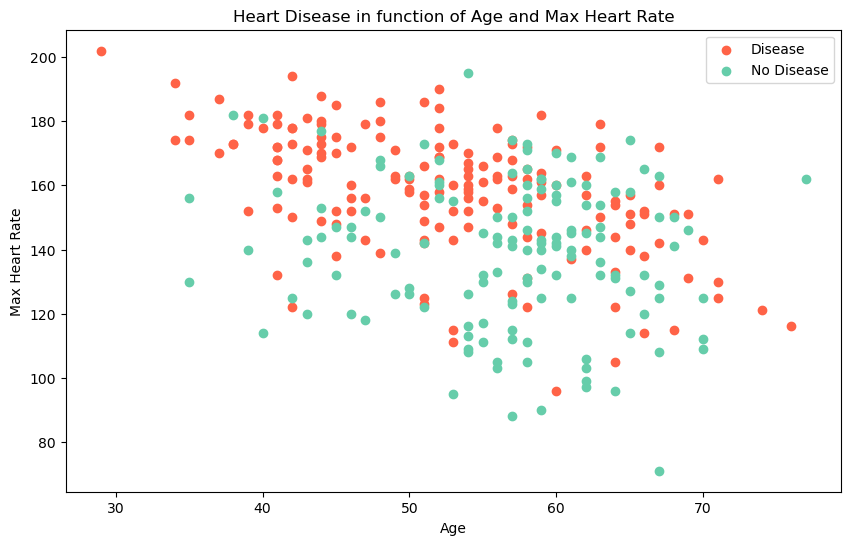

In [11]:
plt.figure(figsize=(10,6))

# Scatter with postive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c="tomato")

# Scatter with negative examples

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "mediumaquamarine");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Heart Disease Frequency per Chest Pain Type

*   cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [12]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


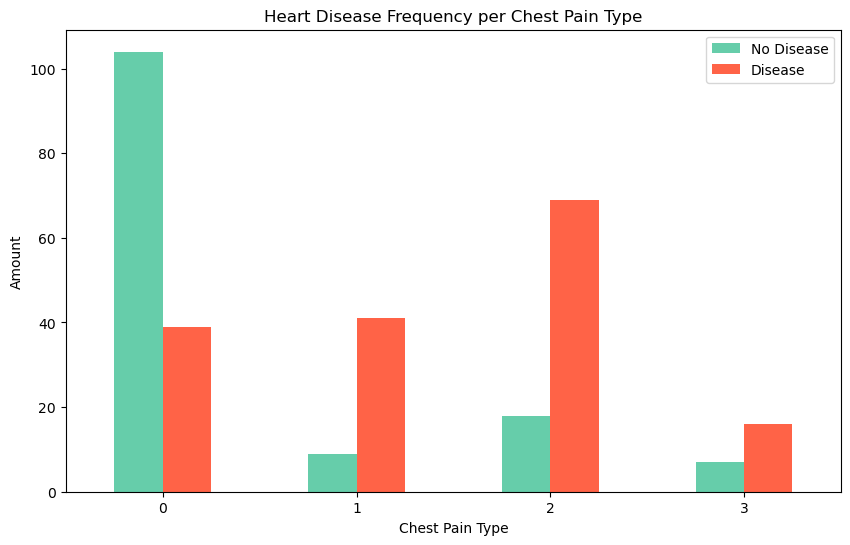

In [13]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize = (10,6),
                                  color = ["mediumaquamarine", "tomato" ])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [14]:
## Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


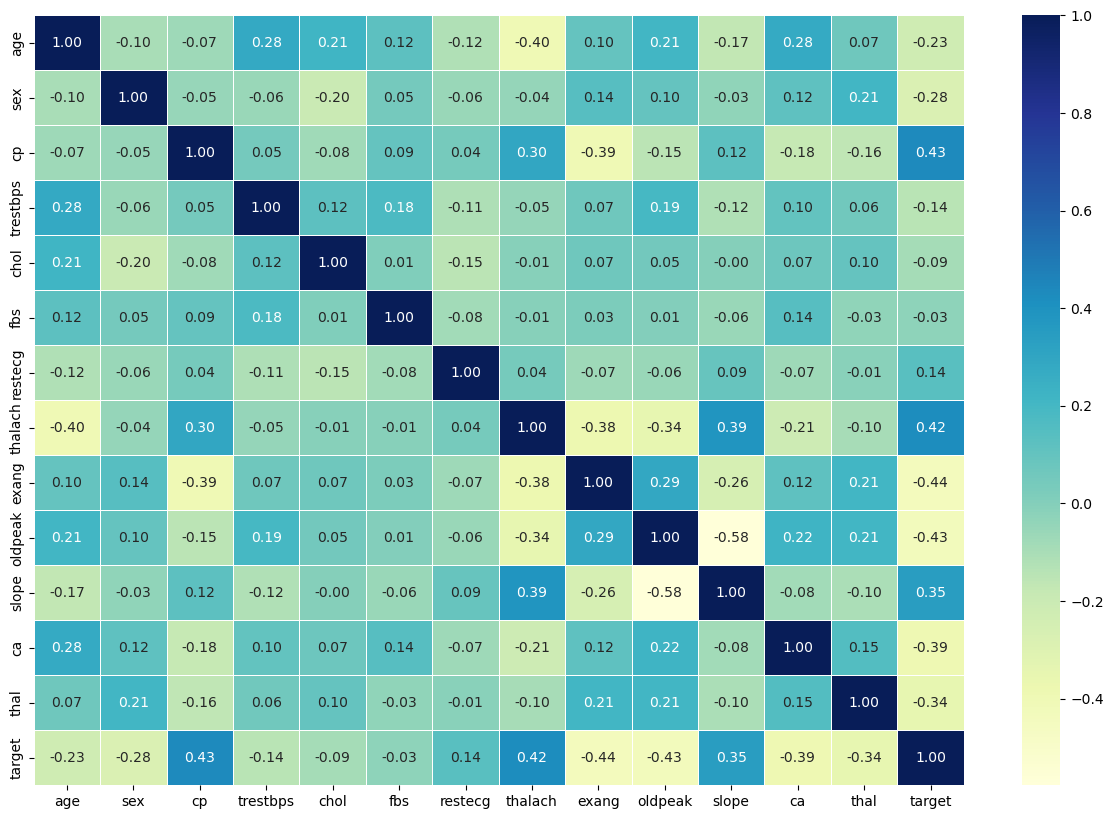

In [15]:
# Correlation Matrix with colored gradients
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modelling 💻

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Split into features(X) and labels(y)

X = df.drop("target", axis=1)
y = df["target"]

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [21]:
X_train, len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

In [22]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

## Experimenting with Machine Learning models and picking the best 🤖

In [59]:
# Putting models in dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=5000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Function to fit and score the models
def fit_and_score (models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [60]:
model_scores = fit_and_score(models = models,
                             X_train=X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison📊

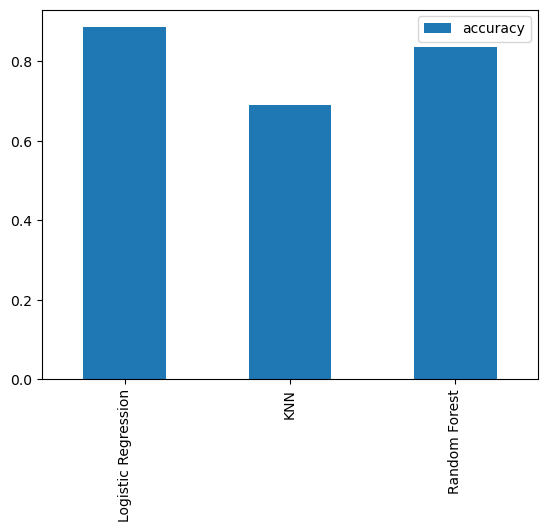

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter Tuning🎛️

### Hyperparameter tuning with RandomizedSearchCV 🎚️

We're going to tune:
* `LogisticRegression()`
* `RandomForestClassifier()`

using RandomizedSearchCV

In [26]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}


# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50), 
           "max_depth": [None, 3, 5 ,10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


### 🎚️ Tuning LogisticRegression using RandomizedSearchCV 

In [27]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### 🎚️ Tuning RandomForestClassifier using RandomizedSearchCV

In [30]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(X_test, y_test)


0.8688524590163934

Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.
But since `LogisticRegression` is pulling out in front, we'll try tuning it further with `GridSearchCV`


## Hyperparameter Tuning with GridSearchCV🎛️🔎

* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

In [33]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [34]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating a classification model✅

Checking some metrics on a tuned model.

We want:
* ROC curve and AUC score - `plot_roc_curve()`
* Confusion matrix - `confusion_matrix()`
* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-score - `f1_score()`


To access them, we'll have to use our model to make predictions on the test set. We'll make predictions on the test data.

In [36]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### 📈 ROC curve and AUC score

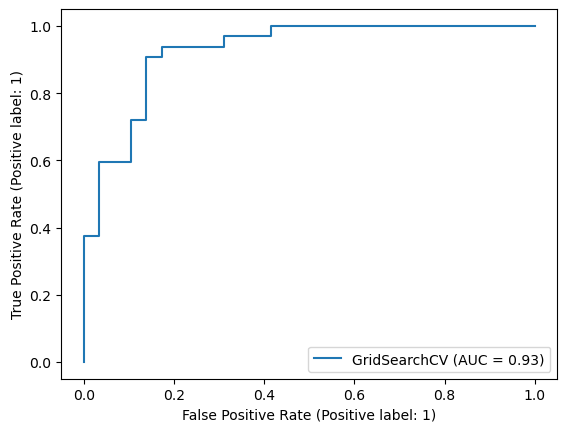

In [37]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

### 🏁Confusion Matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using `confusion_matrix()` and passing it the true labels and predicted labels.

In [38]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


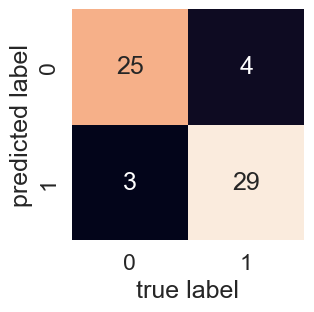

In [39]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

The model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

### 🔖Classification Report

We can make a classification report using `classification_report()`) and passing it the true labels as well as our models predicted labels. 

A classification report will also give us information of the precision and recall of our model for each class.

In [40]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

In [41]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

### Finding cross-validated metrics

In [43]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [44]:
# Since there are 5 metrics here, we'll take the average.
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [45]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [46]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [47]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

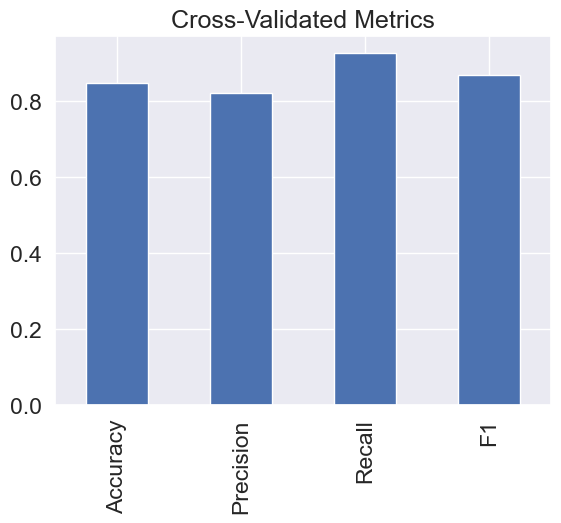

In [48]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature Importance🏷️

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?" 
Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

### For LogisticRegression  we'll use the `coef_` attribute

In [49]:
# Fit
clf.fit(X_train, y_train);

In [50]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [51]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

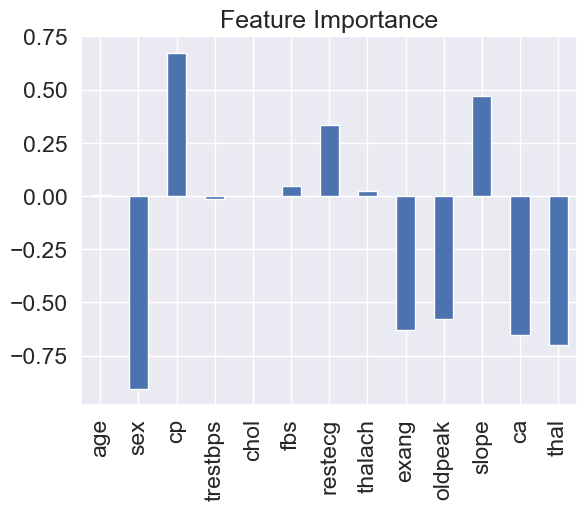

In [52]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

*The larger the value (bigger bar), the more the feature contributes to the models decision.*


According to the model, there's a positive correlation of 0.470, not as strong as `sex` and `target` but still more than 0.

This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.

## Conclusions🪄

* Hence, our machine learning model is can now classify patients with Heart Disease. By detecting these key features early on, there is a potential to mitigate the progression of more severe symptoms
* Out of the three models used (KNN, RandomForestClassifier, LogisticRegression), the LogisticRegression algorithm yields the maximum of 88.5% accuracy.

## *Completed by Lui Kirtan D. Bharali*